In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [5]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.isnull().sum().sort_values(ascending=False)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.shape

(100000, 9)

In [6]:
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')
    

gender: 0.0%
age: 0.0%
hypertension: 0.0%
heart_disease: 0.0%
smoking_history: 0.0%
bmi: 0.0%
HbA1c_level: 0.0%
blood_glucose_level: 0.0%
diabetes: 0.0%


In [7]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
df.corr()

C:\Users\Fahim Arefin\AppData\Local\Temp\ipykernel_14292\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


C:\Users\Fahim Arefin\AppData\Local\Temp\ipykernel_14292\4108151074.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',linecolor='white',linewidth=2,annot=True)


<Axes: >

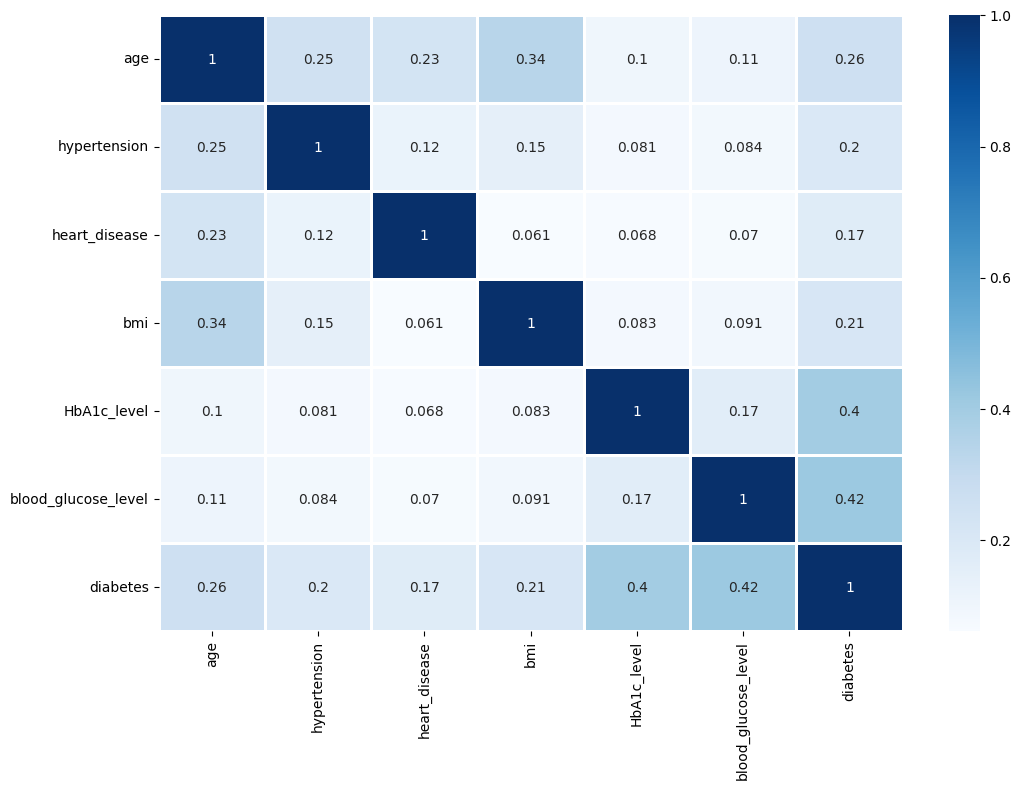

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),cmap='Blues',linecolor='white',linewidth=2,annot=True)

In [16]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [20]:
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])
df = df.drop(['gender', 'smoking_history'], axis=1)
print(df)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  gender_encoded  smoking_history_encoded  
0                      140         0               0                        4  
1                       80         0               0                   

In [21]:
df.dtypes

age                        float64
hypertension                 int64
heart_disease                int64
bmi                        float64
HbA1c_level                float64
blood_glucose_level          int64
diabetes                     int64
gender_encoded               int32
smoking_history_encoded      int32
dtype: object

In [22]:
df['gender_encoded'].unique()

array([0, 1, 2])

In [23]:
df['smoking_history_encoded'].unique()

array([4, 0, 1, 3, 2, 5])

In [24]:
X = df.drop("diabetes" , axis = 1)
Y = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42 ,max_iter = 10000 ).fit(X_train, y_train)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
logistic_test_pred = clf.predict(X_test)
logistic_a_test_acuracy = metrics.accuracy_score(y_test, logistic_test_pred)

logistic_test_pred = clf.predict(X_test)
logistic_a_test_precisiion = metrics.precision_score(y_test, logistic_test_pred,average='weighted')


logistic_test_pred = clf.predict(X_test)
logistic_a_test_recall = metrics.recall_score(y_test, logistic_test_pred,average='weighted')


logistic_test_pred = clf.predict(X_test)
logistic_a_test_f1 = metrics.f1_score(y_test, logistic_test_pred,average='weighted')

In [28]:
print('logistic = test accuracy = %.4f'% logistic_a_test_acuracy)
print('logistic = test precisiion = %.4f'% logistic_a_test_precisiion)

print('logistic = test recall = %.4f'% logistic_a_test_recall)
print('logistic = test f1 = %.4f'% logistic_a_test_f1)

logistic = test accuracy = 0.9587
logistic = test precisiion = 0.9563
logistic = test recall = 0.9587
logistic = test f1 = 0.9555


In [29]:
logistic_c_test = confusion_matrix(y_test, logistic_test_pred)

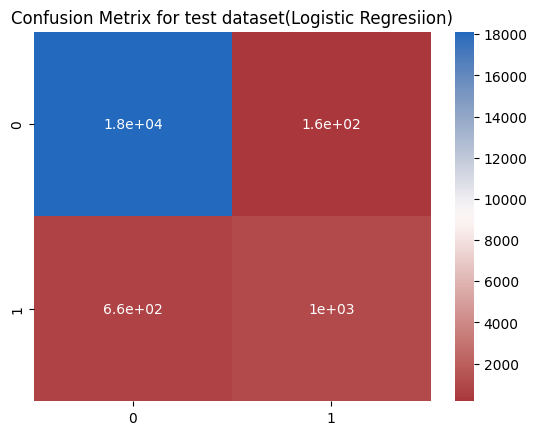

In [30]:
sns.heatmap(logistic_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(Logistic Regresiion)");

In [31]:
logistic_report_test = classification_report(y_test,logistic_test_pred)
print(logistic_report_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [32]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB().fit(X, Y)



y_pred= naive_bayes.predict(X_test)
y_true = y_test


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
naive_bayes_test_pred = naive_bayes.predict(X_test)
naive_bayes_a_test_acuracy = metrics.accuracy_score(y_test, naive_bayes_test_pred)

naive_bayes_test_pred = naive_bayes.predict(X_test)
naive_bayes_a_test_precisiion = metrics.precision_score(y_test, naive_bayes_test_pred,average='weighted')


naive_bayes_test_pred = naive_bayes.predict(X_test)
naive_bayes_a_test_recall = metrics.recall_score(y_test, naive_bayes_test_pred,average='weighted')


naive_bayes_test_pred = naive_bayes.predict(X_test)
naive_bayes_a_test_f1 = metrics.f1_score(y_test, naive_bayes_test_pred,average='weighted')

In [35]:
print('naive_bayes = test accuracy = %.4f'% naive_bayes_a_test_acuracy)
print('naive_bayes= test precisiion = %.4f'% naive_bayes_a_test_precisiion)

print('naive_bayes = test recall = %.4f'% naive_bayes_a_test_recall)
print('naive_bayes = test f1 = %.4f'% naive_bayes_a_test_f1)

naive_bayes = test accuracy = 0.9040
naive_bayes= test precisiion = 0.9214
naive_bayes = test recall = 0.9040
naive_bayes = test f1 = 0.9111


In [37]:
naive_c_test = confusion_matrix(y_test, naive_bayes_test_pred)

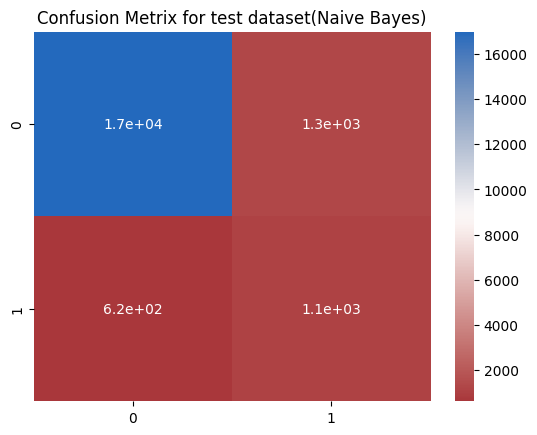

In [38]:
sns.heatmap(naive_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(Naive Bayes)");

In [39]:
naive_report_test = classification_report(y_test,naive_bayes_test_pred)
print(naive_report_test)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18292
           1       0.46      0.64      0.53      1708

    accuracy                           0.90     20000
   macro avg       0.71      0.78      0.74     20000
weighted avg       0.92      0.90      0.91     20000



In [40]:
from sklearn import svm

Svc = svm.SVC().fit(X_train, y_train)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
Svc_test_pred = Svc.predict(X_test)
Svc_a_test_acuracy = metrics.accuracy_score(y_test, Svc_test_pred)

Svc_test_pred = Svc.predict(X_test)
Svc_a_test_precisiion = metrics.precision_score(y_test, Svc_test_pred,average='weighted')


Svc_test_pred = Svc.predict(X_test)
Svc_a_test_recall = metrics.recall_score(y_test, Svc_test_pred,average='weighted')


Svc_test_pred = Svc.predict(X_test)
Svc_a_test_f1 = metrics.f1_score(y_test, Svc_test_pred,average='weighted')

In [43]:
print('Svc = test accuracy = %.4f'% Svc_a_test_acuracy)
print('Svc = test precisiion = %.4f'% Svc_a_test_precisiion)

print('Svc = test recall = %.4f'% Svc_a_test_recall)
print('Svc = test f1 = %.4f'% Svc_a_test_f1)

Svc = test accuracy = 0.9474
Svc = test precisiion = 0.9502
Svc = test recall = 0.9474
Svc = test f1 = 0.9364


In [44]:
svc_c_test = confusion_matrix(y_test, Svc_test_pred)

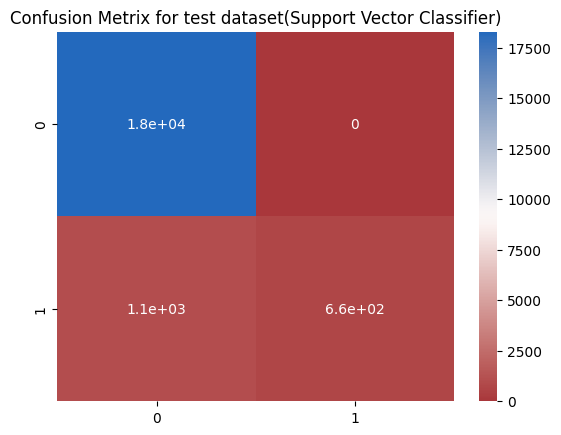

In [45]:
sns.heatmap(svc_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(Support Vector Classifier)");

In [46]:
svc_report_test = classification_report(y_test,Svc_test_pred)
print(svc_report_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       1.00      0.38      0.55      1708

    accuracy                           0.95     20000
   macro avg       0.97      0.69      0.76     20000
weighted avg       0.95      0.95      0.94     20000



In [54]:
from sklearn.ensemble import VotingClassifier


ensemble_model_classification_diabates = VotingClassifier(
    estimators=[('lr', clf ),  ('nb', naive_bayes),('svm',Svc)],
    voting='hard'
)


ensemble_model_classification_diabates.fit(X_train, y_train)


y_pred= ensemble_predictions = ensemble_model_classification_diabates.predict(X_test)
y_true = y_test

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)


precision = precision_score(y_true, y_pred, average='weighted')  
print("Precision:", precision)


recall = recall_score(y_true, y_pred, average='weighted')  
print("Recall:", recall)


f1 = f1_score(y_true, y_pred, average='weighted') 
print("F1 Score:", f1)


Accuracy: 0.95615
Precision: 0.9541023305512047
Recall: 0.95615
F1 Score: 0.9512601089919248


In [50]:
from joblib import dump

In [58]:
ensemble_model_classification_diabetes_path=r'G:\412-project-main\Project\savedModels\ensemble_model_classification_diabates.joblib'
dump(ensemble_model_classification_diabates,ensemble_model_classification_diabetes_path)

['G:\\412-project-main\\Project\\savedModels\\ensemble_model_classification_diabates.joblib']